In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-test.csv
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv


In [2]:
test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')
train = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv')
sub = pd.read_csv('/kaggle/input/GiveMeSomeCredit/sampleEntry.csv')
dictionary = pd.read_excel('/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls')

- columns 설명.
- SeriousDiqin2yrs : 연체를 90일 이상 경과한 경험자.(Y)
- RevolvingUtilizationOfUnsecuredLines : 부동산을 제외한 신용카드 및 개인 신용 라인의 총 잔액과 자동차 대출과 같은 할부 부채가 없는 경우 신용 한도 비율의 합계로 나눈 값
- age : 차입자 연령.
- NumberOfTime30-59DaysPastDueNotWorse : 대출자가 연체된 지 30~59일이 지났지만 최근 2년 사이 더 심하지는 않았다.
- DebtRatio : 월별 부채 지급, 위자료, 생활비를 월별 총소득으로 나눈다.
- MonthlyIncome : 월별 수입.
- NumberOfOpenCreditLinesAndLoans : 공개 대출 수(자동차 대출 또는 담보 대출과 같은 설치) 및 신용 한도(예: 신용 카드)
- NumberOfTimes90DaysLate : 대출자가 연체된 지 90일 이상 경과한 횟수.
- NumberRealEstateLoansOrLines : 주택 담보 대출 및 부동산 대출 건수(신용등급 포함)
- NumberOfTime60-89DaysPastDueNotWorse : 대출자가 연체된 지 60-89일이 지났지만 최근 2년 사이 더 나빠진 것은 없다.
- NumberOfDependents : 자신을 제외한 가족 중 부양가족 수(배우자, 자녀 등)

In [3]:
train.head(2)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


In [4]:
display(train,test)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [5]:
all_data = pd.concat([train,test])
all_data

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [6]:
#필요 없는 변수 제거.
all_data = all_data.drop(['Unnamed: 0'],axis=1)
all_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
101498,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [7]:
# NA 결측값 확인.
all_data.info()

# MonthlyIncome, NumberOfDependents에 결측값이 존재하는 것을 확인할 수 있음.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 2   age                                   251503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 4   DebtRatio                             251503 non-null  float64
 5   MonthlyIncome                         201669 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 7   NumberOfTimes90DaysLate               251503 non-null  int64  
 8   NumberRealEstateLoansOrLines          251503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 10  NumberOfDependents                    244953 non-null  float64
dtype

In [8]:
# 결측값 평균으로 채우기.
all_data['MonthlyIncome'] = all_data['MonthlyIncome'].fillna(all_data['MonthlyIncome'].mean())
all_data['NumberOfDependents'] = all_data['NumberOfDependents'].fillna(all_data['NumberOfDependents'].mean())

### 변수 확인해보기

- SeriousDlqin2yrs

In [9]:
train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

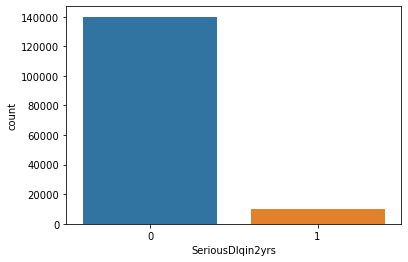

In [10]:
sns.countplot(x='SeriousDlqin2yrs',data=train)

In [11]:
# 0과 1의 차이가 크다는 것을 알 수 있음.
# 0이 대부분인 것을 확인할 수 있습니다.

- RevolvingUtilizationOfUnsecuredLines

In [12]:
all_data['RevolvingUtilizationOfUnsecuredLines'].describe()

count    251503.000000
mean          5.750415
std         229.633980
min           0.000000
25%           0.029977
50%           0.153575
75%           0.561293
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [13]:
all_data[all_data['RevolvingUtilizationOfUnsecuredLines']==50708]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
85489,0.0,50708.0,55,0,0.221757,38000.0,7,0,2,0,0.0


In [14]:
all_data['RevolvingUtilizationOfUnsecuredLines']

0         0.766127
1         0.957151
2         0.658180
3         0.233810
4         0.907239
            ...   
101498    0.282653
101499    0.922156
101500    0.081596
101501    0.335457
101502    0.441842
Name: RevolvingUtilizationOfUnsecuredLines, Length: 251503, dtype: float64

In [15]:
#일단 MAX값이 엄청난 outlier일 확률이 높다.

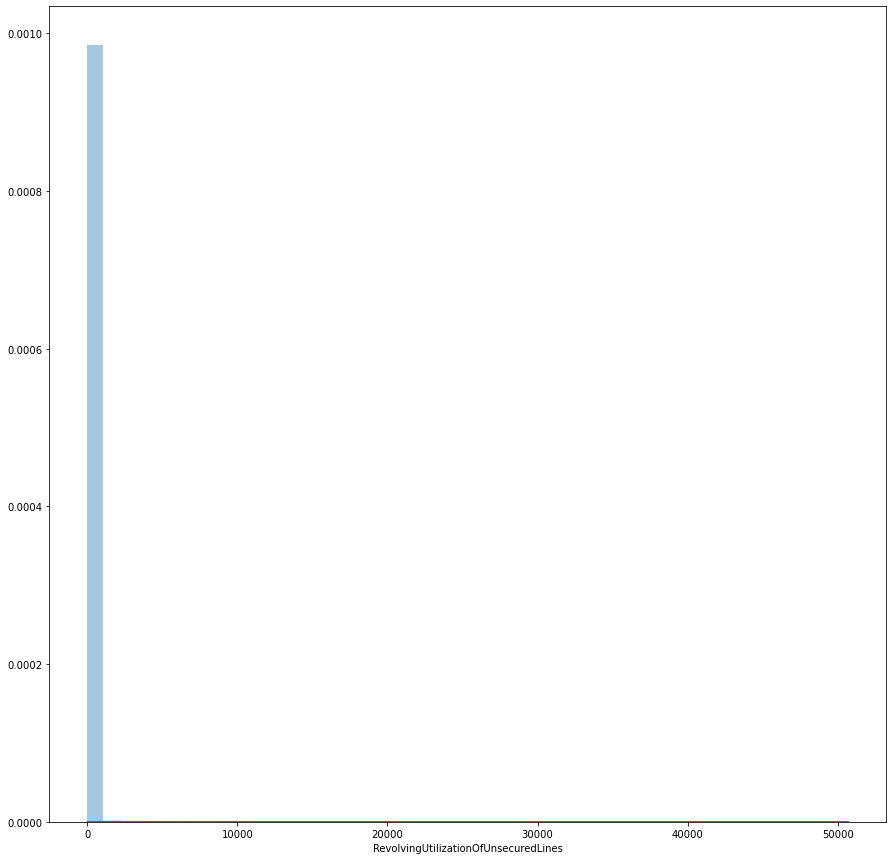

In [16]:
# 변수 확인.
plt.figure(figsize=(15,15))
sns.distplot(all_data['RevolvingUtilizationOfUnsecuredLines'])
#plt.hist(train['RevolvingUtilizationOfUnsecuredLines'],bins=30) # 혹시 이 코드에서는 10000이상인 경우 수가 너무적어서 그래프에 안찍히는데, 찍히는 방법을 알 수 있을지.

In [17]:
# 0.6보다 큰 것은 1, 1보다 작은 것은 0.
# all_data['RevolvingUtilizationOfUnsecuredLines'] = all_data['RevolvingUtilizationOfUnsecuredLines'].apply(lambda x : 1 if x>=0.6 else 0)

### age

In [18]:
all_data['age'].describe()

count    251503.000000
mean         52.339694
std          14.775120
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [19]:
all_data.head(2)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0


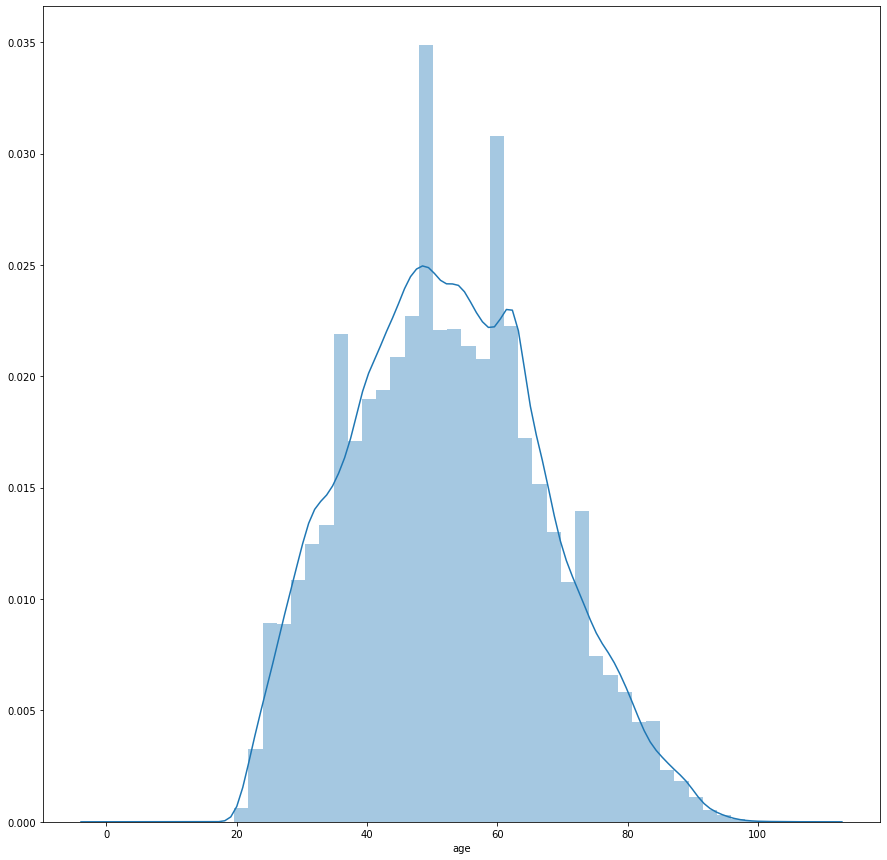

In [20]:
plt.figure(figsize=(15,15))
sns.distplot(all_data['age'])

In [21]:
# 약 40대에서 65세 사이가 많다는 것을 알 수 있다.

In [22]:
all_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

### Monthly Income

In [23]:
all_data['MonthlyIncome'].head()

0     9120.0
1     2600.0
2     3042.0
3     3300.0
4    63588.0
Name: MonthlyIncome, dtype: float64

In [24]:
all_data['MonthlyIncome'].describe()

count    2.515030e+05
mean     6.744818e+03
std      2.302918e+04
min      0.000000e+00
25%      3.900000e+03
50%      6.598000e+03
75%      7.385000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

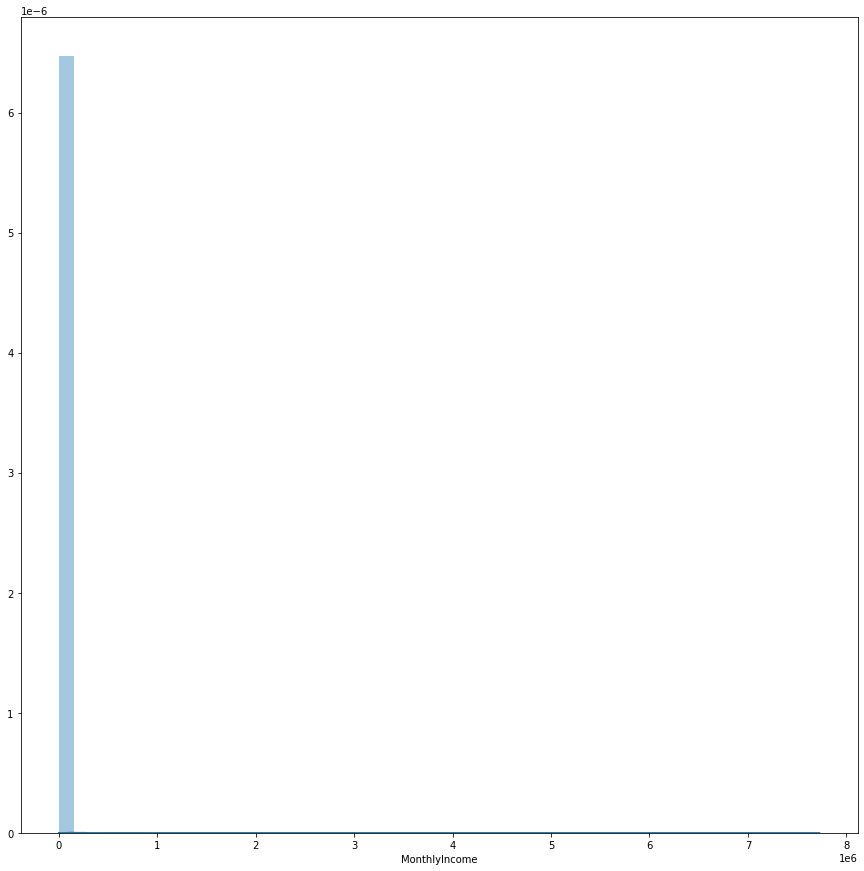

In [25]:
plt.figure(figsize=(15,15))
sns.distplot(all_data['MonthlyIncome'])

In [26]:
# 75% 이상인 값은 1 나머지는 0으로 변환.
# all_data['MonthlyIncome']=all_data['MonthlyIncome'].apply(lambda x : 1 if x>7.385000e+03 else 0)
# all_data['MonthlyIncome'].value_counts()

In [27]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  251503 non-null  float64
 2   age                                   251503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  251503 non-null  int64  
 4   DebtRatio                             251503 non-null  float64
 5   MonthlyIncome                         251503 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       251503 non-null  int64  
 7   NumberOfTimes90DaysLate               251503 non-null  int64  
 8   NumberRealEstateLoansOrLines          251503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  251503 non-null  int64  
 10  NumberOfDependents                    251503 non-null  float64
dtype

In [28]:
all_data['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
all_data['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()
all_data['NumberOfTimes90DaysLate'].value_counts()

0     237447
1       8837
2       2617
3       1112
4        482
98       477
5        233
6        124
7         64
8         40
9         33
10        10
11         6
96         6
13         4
12         3
14         2
15         2
17         2
16         1
18         1
Name: NumberOfTimes90DaysLate, dtype: int64

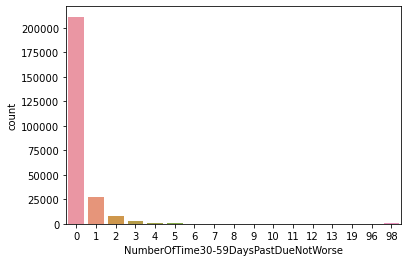

In [29]:
sns.countplot(all_data['NumberOfTime30-59DaysPastDueNotWorse'])

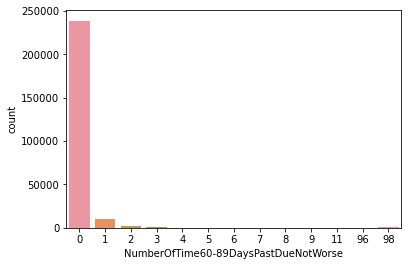

In [30]:
sns.countplot(all_data['NumberOfTime60-89DaysPastDueNotWorse'])

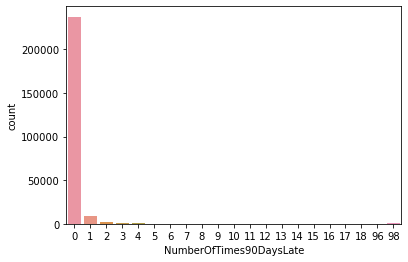

In [31]:
sns.countplot(all_data['NumberOfTimes90DaysLate'])

In [32]:
# 3가지 모두 압도적으로 0이 많기 때문에 0인것을 제외한 나머지를 1로 두겠다.

In [33]:
# all_data['NumberOfTime30-59DaysPastDueNotWorse'] = all_data['NumberOfTime30-59DaysPastDueNotWorse'].apply(lambda x: 1 if x!=0 else 0)
# all_data['NumberOfTime60-89DaysPastDueNotWorse'] = all_data['NumberOfTime60-89DaysPastDueNotWorse'].apply(lambda x: 1 if x!=0 else 0)
# all_data['NumberOfTimes90DaysLate'] = all_data['NumberOfTimes90DaysLate'].apply(lambda x : 1 if x!=0 else 0)
# all_data.head(2)

In [34]:
all_data2 = all_data.drop(['SeriousDlqin2yrs'],axis=1)
all_data2

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.000000
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.000000
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.000000
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.000000
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.000000,5,0,0,0,0.000000
101499,0.922156,36,3,0.934217,7615.000000,8,0,2,0,4.000000
101500,0.081596,70,0,836.000000,6744.818167,3,0,0,0,0.761995
101501,0.335457,56,0,3568.000000,6744.818167,8,0,2,1,3.000000


In [35]:
train2=all_data2[:len(train)]
test2 = all_data2[len(train):]

In [36]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.1)
xgb.fit(train2,train['SeriousDlqin2yrs'])
result = xgb.predict_proba(test2)

In [37]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_jobs=-1)
# rf.fit(train2,train['SeriousDlqin2yrs'])
# result = rf.predict_proba(test2)

In [38]:
result

array([[0.92716825, 0.07283177],
       [0.9486451 , 0.0513549 ],
       [0.98714876, 0.01285126],
       ...,
       [0.9954908 , 0.00450922],
       [0.93640214, 0.06359786],
       [0.964828  , 0.03517199]], dtype=float32)

In [39]:
sub['Probability'] = result[:,1]
result

array([[0.92716825, 0.07283177],
       [0.9486451 , 0.0513549 ],
       [0.98714876, 0.01285126],
       ...,
       [0.9954908 , 0.00450922],
       [0.93640214, 0.06359786],
       [0.964828  , 0.03517199]], dtype=float32)

In [40]:
# sub.Probability.value_counts()

In [41]:
sub.to_csv('sub.csv',index=False)